# Part 2b. Random Forest Model on Activities (Include Hyperparameter tuning by RandomSearchCV)
GONG ZERUI 04/14

### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings

### 2. Split train-test datasets

In [2]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis=1)


print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)


X_train :  (7352, 561)
y_train :  (7352,)
X_test :  (2947, 561)
y_test :  (2947,)


### 3. Build Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV)

In [4]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=2, stop=50, num=2)]


In [5]:
# Create the random grid
param = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
}

rf_Model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_rs = RandomizedSearchCV(
    estimator=rf_Model, param_distributions=param, random_state = 42
)

In [6]:
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 50],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42)

### 4. Print out best random search parameters


In [7]:
print("Best estimator : ", rf_rs.best_estimator_)
print("Best set of parameters : ", rf_rs.best_params_)

Best estimator :  RandomForestClassifier(max_depth=50, n_estimators=115)
Best set of parameters :  {'n_estimators': 115, 'max_depth': 50}


### 5. Print out Accuracy

In [8]:
from sklearn.metrics import accuracy_score

y_pred = rf_rs.predict(X_test)
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest with hyperparameter tuning : ", rf_accuracy)

Accuracy using Random forest with hyperparameter tuning :  0.9334916864608076


### 5. Print out confusion matrix

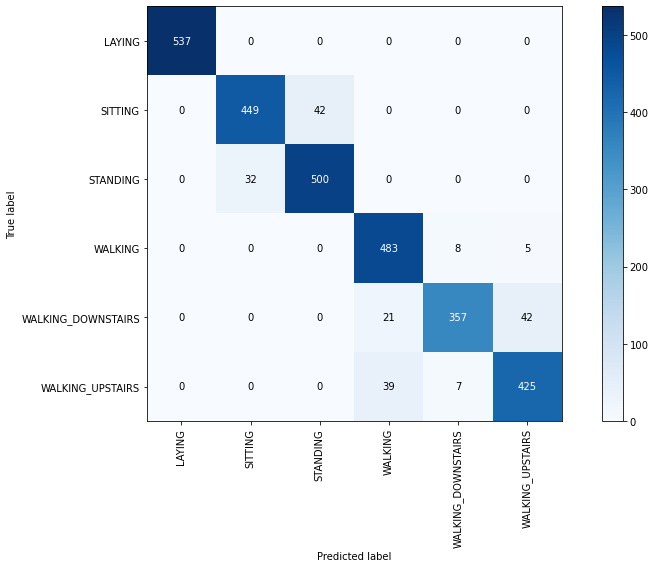

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()


### 6. Find sorted feature list based on importance

In [17]:
# print importance
rf_Model = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model.fit(X_train, y_train)
d = {'Parameter':X_train.columns,'FeatureImportance':rf_Model.feature_importances_}
df_importance = pd.DataFrame(d)
df_importance_sorted = df_importance.sort_values('FeatureImportance', ascending= False)

### 7. Delete some features and re-test models

### a.  Drop features in main feature group one by one 

In [11]:
main_feature_list = ['fBodyAcc','fBodyGyro','fBodyAccJerk','tGravityAcc','tBodyAcc','tBodyGyroJerk','tBodyGyro','tBodyAccJerk',
                     'tBodyAccMag','tGravityAccMag','tBodyAccJerkMag','tBodyGyroMag','tBodyGyroJerkMag','fBodyAccMag',
                     'fBodyBodyAccJerkMag','fBodyBodyGyroMag','fBodyBodyGyroJerkMag','angle']
for feature in main_feature_list:
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    rf_Model_main = RandomForestClassifier(max_depth=50, n_estimators=157)
    rf_Model_main.fit(X_train_drop_main_feature, y_train)
    y_pred_drop_main =rf_Model_main.predict(X_test_drop_main_feature)
    print("drop " + feature + ":")
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

drop fBodyAcc:
Model accuracy score: 0.9226
drop fBodyGyro:
Model accuracy score: 0.9104
drop fBodyAccJerk:
Model accuracy score: 0.9321
drop tGravityAcc:
Model accuracy score: 0.9369
drop tBodyAcc:
Model accuracy score: 0.9226
drop tBodyGyroJerk:
Model accuracy score: 0.9233
drop tBodyGyro:
Model accuracy score: 0.9169
drop tBodyAccJerk:
Model accuracy score: 0.9274
drop tBodyAccMag:
Model accuracy score: 0.9243
drop tGravityAccMag:
Model accuracy score: 0.9270
drop tBodyAccJerkMag:
Model accuracy score: 0.9237
drop tBodyGyroMag:
Model accuracy score: 0.9257
drop tBodyGyroJerkMag:
Model accuracy score: 0.9240
drop fBodyAccMag:
Model accuracy score: 0.9213
drop fBodyBodyAccJerkMag:
Model accuracy score: 0.9267
drop fBodyBodyGyroMag:
Model accuracy score: 0.9284
drop fBodyBodyGyroJerkMag:
Model accuracy score: 0.9284
drop angle:
Model accuracy score: 0.9365


### b. Drop top 10% of important features

In [12]:
top10p_features = df_importance_sorted.head(56).Parameter
X_train_afterDrop10p = X_train.drop(top10p_features,axis=1)
X_test_afterDrop10p = X_test.drop(top10p_features,axis=1)
rf_Model_drop10p = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model_drop10p.fit(X_train_afterDrop10p, y_train)
y_pred_10p = rf_Model_drop10p.predict(X_test_afterDrop10p)
print('Drop top 10%, model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_10p)))

Drop top 10%, model accuracy score: 0.9080


### c. Drop top 30% of important features

In [13]:
top30p_features = df_importance_sorted.head(170).Parameter
X_train_afterDrop30p = X_train.drop(top30p_features,axis=1)
X_test_afterDrop30p = X_test.drop(top30p_features,axis=1)
rf_Model_drop30p = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model_drop30p.fit(X_train_afterDrop30p, y_train)
y_pred_30p = rf_Model_drop30p.predict(X_test_afterDrop30p)
print('Drop top 30%, model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_30p)))

Drop top 30%, model accuracy score: 0.8751


### d. Drop top 50% of important features

In [16]:
top50p_features = df_importance_sorted.head(280).Parameter
X_train_afterDrop50p = X_train.drop(top50p_features,axis=1)
X_test_afterDrop50p = X_test.drop(top50p_features,axis=1)
rf_Model_drop50p = RandomForestClassifier(max_depth=50, n_estimators=157)
rf_Model_drop50p.fit(X_train_afterDrop50p, y_train)
y_pred_50p = rf_Model_drop50p.predict(X_test_afterDrop50p)
print('Drop top 50%, model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_50p)))

Drop top 50%, model accuracy score: 0.7900


### e. Hide one sensor

In [15]:
main_feature_list = ['Acc','Gyro']
for feature in main_feature_list:
    X_train_drop_main_feature = X_train.drop(list(X_train.filter(regex = feature)),axis=1)
    X_test_drop_main_feature = X_test.drop(list(X_test.filter(regex = feature)),axis=1)
    rf_Model_main = RandomForestClassifier(max_depth=50, n_estimators=157)
    rf_Model_main.fit(X_train_drop_main_feature, y_train)
    y_pred_drop_main =rf_Model_main.predict(X_test_drop_main_feature)
    print("drop " + feature + ":")
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_drop_main)))

drop Acc:
Model accuracy score: 0.9074
drop Gyro:
Model accuracy score: 0.8853
